In [1]:
import numpy as np
import torch
from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
data_dir = '/vast/xj2173/diffeo/data/temp_inv_data/'
numbers = [f"{i:02}" for i in range(100)]
data_name = [data_dir + f'15-100-4-4-3-224-224_image-00{i}_activation_layer-13.pt' for i in numbers]




In [3]:
# data[0] is the 0th picture, data[1] is the 1st picture, etc..
data = [torch.load(file_name, map_location=torch.device('cpu')) for file_name in tqdm(data_name)]
data = torch.stack(data, dim=0)
data.shape

100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


torch.Size([100, 1500, 64, 28, 28])

- 100 different images
- 15 diffeo strengths
- 100 individual diffeos per diffeo strength
- 256 channels
- 7 x 7 image

In [4]:
data = data.reshape(100, 15, 100, 64, 28, 28)


In [5]:
diffeo_strengths = [0.01, 0.05, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.4, 0.45, 0.5]

100%|██████████| 64/64 [00:15<00:00,  4.06it/s]


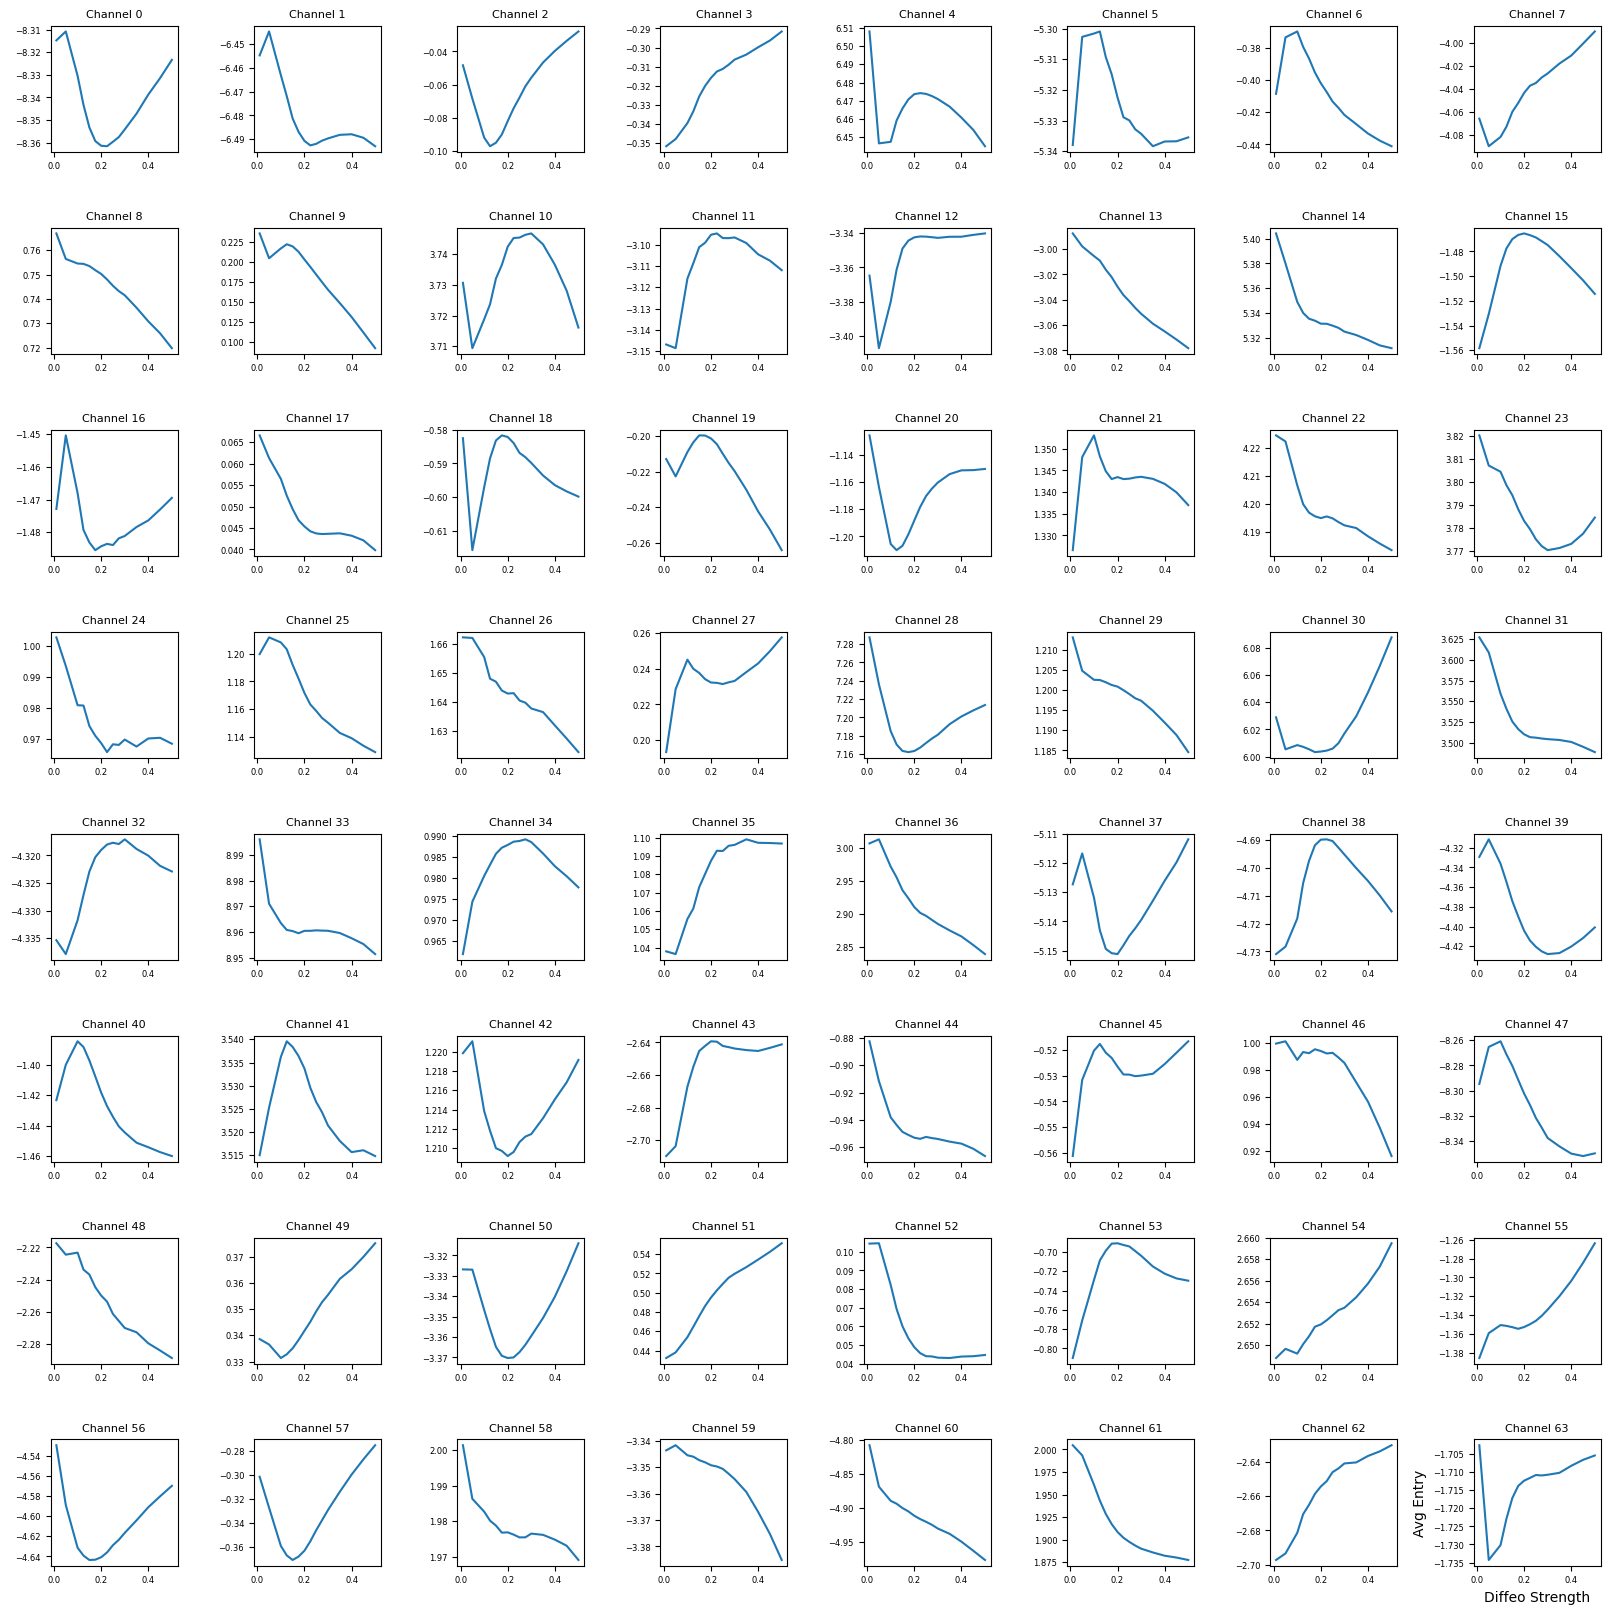

In [7]:
#Assuming 'data' and 'diffeo_strengths' are already defined
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.6)

for channel_id in tqdm(range(64)):
    row = channel_id // 8
    col = channel_id % 8
    ax = axes[row, col]

    quantity_per_channel = []
    for i, _ in enumerate(diffeo_strengths):
        data_sliced = data[:, i, :, channel_id, :, :]
        quantity = torch.mean(data_sliced)
        quantity_per_channel.append(quantity.item())  # Convert tensor to Python number

    ax.plot(diffeo_strengths, quantity_per_channel)
    ax.set_title(f'Channel {channel_id}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)

# Display the plots
plt.xlabel('Diffeo Strength')
plt.ylabel('Avg Entry')
plt.show()